In [2]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
from matplotlib import rcParams
np.random.seed(42)
tf.random.set_seed(42)

rcParams['figure.figsize'] = 16, 10

In [9]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

In [11]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [17]:
df.head(10)

,sine
0.0,0.248357
0.1,0.030701
0.2,0.522514
0.3,1.057035
0.4,0.272342
0.5,0.362357
0.6,1.354249
0.7,1.027935
0.8,0.482619
0.9,1.054607


In [32]:
def data(XX, yy):
    X, y = [], []
    for i in range(len(XX) - 10):
        v = XX.iloc[i:(i + 10)].values
        X.append(v)
        y.append(yy.iloc[i + 10])

    X = np.array(X)
    y = np.array(y)
    return X, y

In [33]:
train_x, train_y = data(train, train.sine)
test_x, test_y = data(test, test.sine)

In [35]:
train_x.shape

(790, 10, 1)

In [36]:
train_y.shape

(790,)

In [40]:
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as ly
from tensorflow.keras.optimizers import Adam

model = Sequential([
    ly.LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2])),
    ly.Dense(units=1)
])

model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.001))

## DO NOT SHUFFLE THE DATA, THE ORDER OF DATA MATTERS!

In [41]:
history = model.fit(train_x, train_y,
                   epochs=30, batch_size=16,
                   validation_split=0.1,
                   verbose=1, shuffle=False
)

Epoch 1/30
45/45 [==============================] - 1s 17ms/step - loss: 0.4001 - val_loss: 0.3553
Epoch 2/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3258 - val_loss: 0.3224
Epoch 3/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3192 - val_loss: 0.3202
Epoch 4/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3181 - val_loss: 0.3177
Epoch 5/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3172 - val_loss: 0.3159
Epoch 6/30
45/45 [==============================] - 0s 8ms/step - loss: 0.3164 - val_loss: 0.3145
Epoch 7/30
45/45 [==============================] - 0s 6ms/step - loss: 0.3157 - val_loss: 0.3132
Epoch 8/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3150 - val_loss: 0.3119
Epoch 9/30
45/45 [==============================] - 0s 6ms/step - loss: 0.3143 - val_loss: 0.3107
Epoch 10/30
45/45 [==============================] - 0s 6ms/step - loss: 0.3136 - val_loss: 0.3095
Epoch 11/30
45/45 

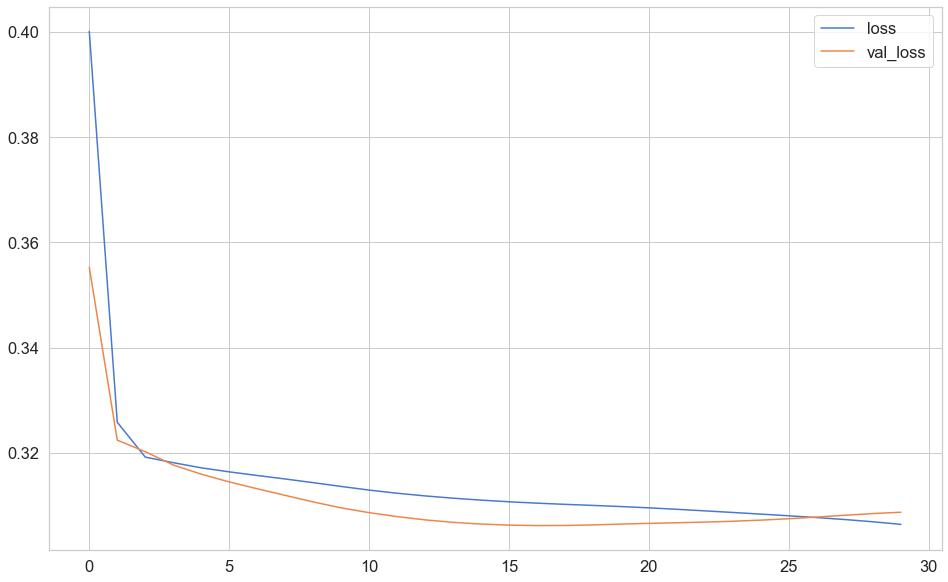

In [45]:
sns.set(style="whitegrid", palette="muted", font_scale=1.5)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["loss", "val_loss"])
plt.show()

Text(0.5, 1.0, 'Sine function')

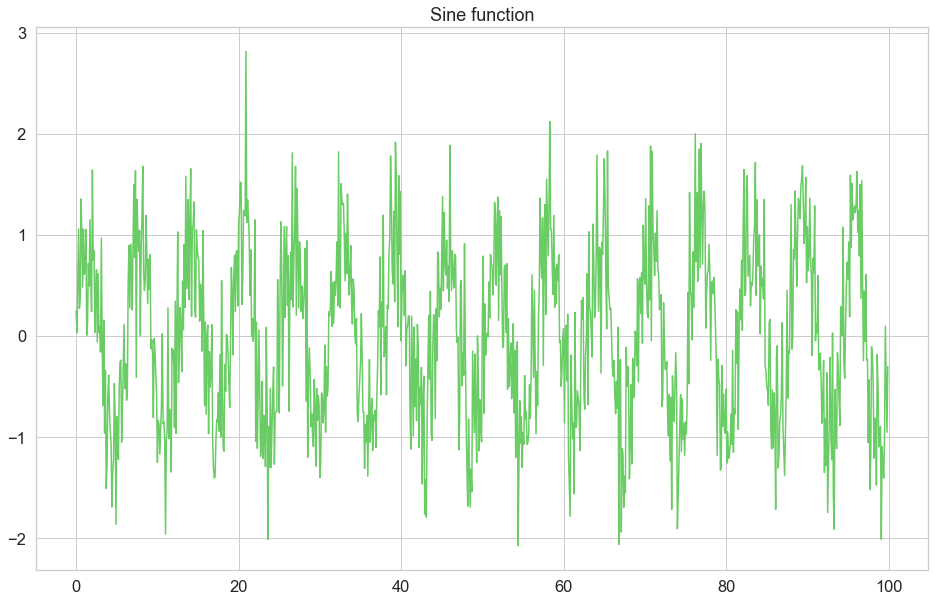

In [51]:
plt.plot(df, color="g")
plt.title("Sine function")

In [52]:
y_pred = model.predict(test_x)

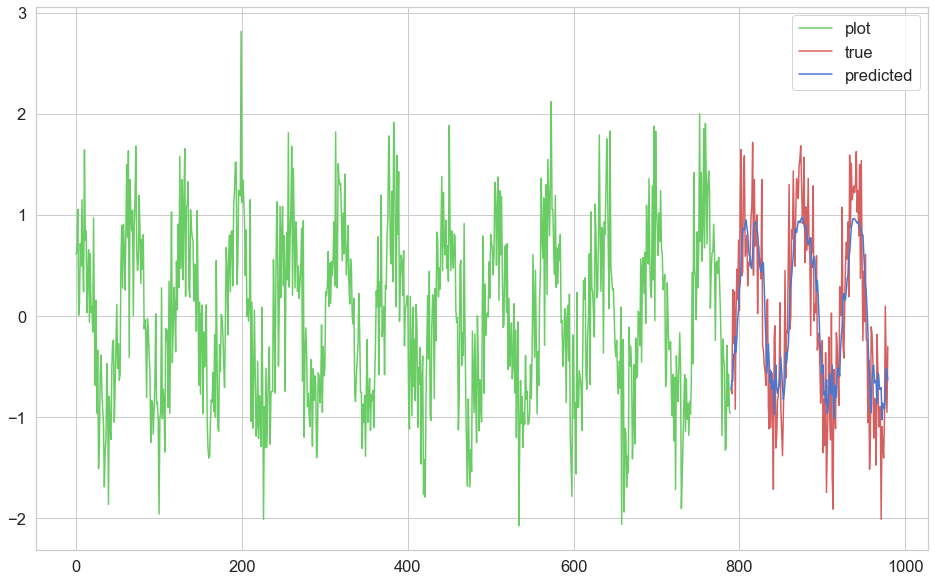

In [64]:
plt.plot(np.arange(0, len(train_y)), train_y, color="g", label="plot")
plt.plot(np.arange(len(train_y), len(train_y) + len(test_y)), test_y, color="r", label="true")
plt.plot(np.arange(len(train_y), len(train_y) + len(test_y)), y_pred, color="b", label="predicted")
plt.legend()

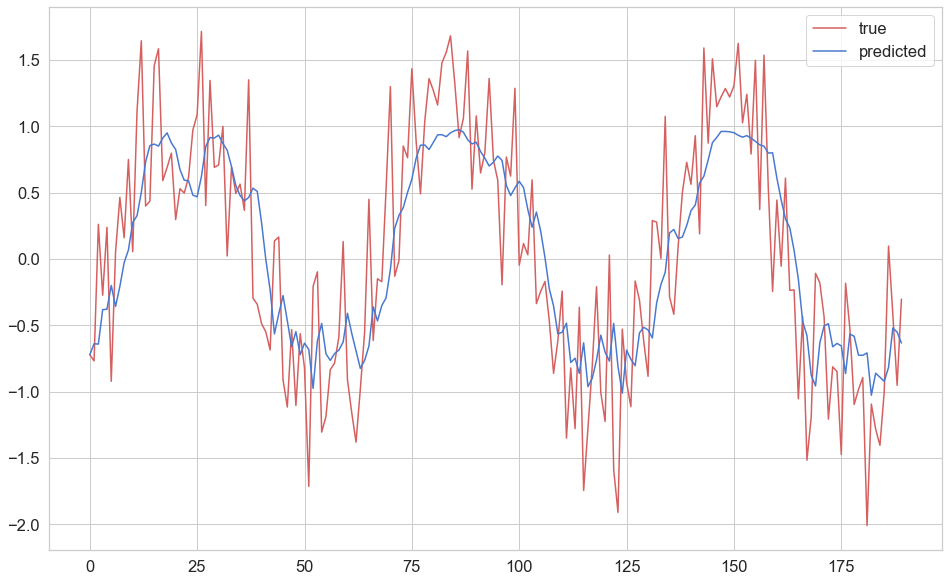

In [66]:
plt.plot(test_y, color="r", label="true")
plt.plot(y_pred, color="b", label="predicted")
plt.legend()